In [14]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


### Read in Files

In [15]:
# Point to data location
path = "./scraper/data/6_23_2025/"
all_files = glob.glob(path + "*.json")

# Read all files into single dataframe
df_list = []
for file in all_files:
    df = pd.read_json(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True) # ignore_index resets index of combined DF to prevent index duplicates

In [16]:
# Create copy of df_unique
df_copy = combined_df.copy()

df_copy.head(5)

,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,...,store,featureScore,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl,isEVTaxCreditEligible
0,27461478,5NPEG4JA8NH134099,2022,Hyundai,Sonata,4D Sedan,SE,19998,NaN,False,...,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",3.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/27461478/hero.j...,NaN,False
1,26070459,JTDEPMAE5NJ210260,2022,Toyota,Corolla,4D Sedan,LE,20998,NaN,False,...,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/26070459/hero.j...,NaN,False
2,27175122,3GCUDFE80RG128481,2024,Chevrolet,Silverado 1500,4D Crew Cab,LT Trail Boss,51998,NaN,False,...,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",10.0,NaN,"[Convenience Package, Z71 Package]",NaN,None,False,https://img2.carmax.com/assets/27175122/hero.j...,NaN,False
3,27072297,1V2WE2CA5PC229115,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,SE w/Tech,32998,NaN,False,...,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,NaN,[Technology Package],NaN,None,False,https://img2.carmax.com/assets/27072297/hero.j...,NaN,False
4,27386026,58AGZ1B12MU110647,2021,Lexus,ES 350,4D Sedan,F-Sport,35998,NaN,False,...,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,NaN,[],NaN,ES,False,https://img2.carmax.com/assets/27386026/hero.j...,NaN,False


In [17]:
# Check data type of all features
pd.set_option('display.max_rows', 69)
df_copy.dtypes

stockNumber                             int64
vin                                    object
year                                    int64
make                                   object
model                                  object
body                                   object
trim                                   object
basePrice                               int64
originalPrice                         float64
hasPriceDrop                             bool
mileage                                 int64
storeId                                 int64
storeName                              object
storeCity                              object
state                                  object
stateAbbreviation                      object
distance                              float64
averageRating                         float64
numberOfReviews                         int64
repairPalData                         float64
isNewArrival                             bool
isTransferable                    

In [18]:
# Convert applicable object data types to strings
df_copy['vin'] = df_copy['vin'].astype('string')
df_copy['make'] = df_copy['make'].astype('string')
df_copy['model'] = df_copy['model'].astype('string')
df_copy['body'] = df_copy['body'].astype('string')
df_copy['trim'] = df_copy['trim'].astype('string')
df_copy['storeName'] = df_copy['storeName'].astype('string')
df_copy['storeCity'] = df_copy['storeCity'].astype('string')
df_copy['state'] = df_copy['state'].astype('string')
df_copy['stateAbbreviation'] = df_copy['stateAbbreviation'].astype('string')
df_copy['transferText'] = df_copy['transferText'].astype('string')
df_copy['transferType'] = df_copy['transferType'].astype('string')
df_copy['exteriorColor'] = df_copy['exteriorColor'].astype('string')
df_copy['interiorColor'] = df_copy['interiorColor'].astype('string')
df_copy['transmission'] = df_copy['transmission'].astype('string')
df_copy['driveTrain'] = df_copy['driveTrain'].astype('string')
df_copy['engineType'] = df_copy['engineType'].astype('string')

# Look into values in each of these objects
    # features
    # highlightedFeatures
    # highlights 
    # transferTags
    # engineSize
    # priorUseDescriptions
    # packages ( could have same values as in features/ highlights )

# Potentially convert to datetime but will probably drop
    # lastMadeSaleableDate

# Dropable columns
    # numberOfFavorites
    # isSaleable
    # isComingSoon
    # isReserved
    # isAvailableToTransact
    # store
    # isSavedCar
    # heroImageUrl
    # isEVTaxCreditEligible

In [23]:
# Check data type of all features post conversion
pd.set_option('display.max_rows', 69)
df_copy.dtypes

stockNumber                          int64
vin                         string[python]
year                                 int64
make                        string[python]
model                       string[python]
body                        string[python]
trim                        string[python]
basePrice                            int64
hasPriceDrop                          bool
mileage                              int64
storeId                              int64
storeName                   string[python]
storeCity                   string[python]
state                       string[python]
stateAbbreviation           string[python]
distance                           float64
averageRating                      float64
numberOfReviews                      int64
isNewArrival                          bool
isTransferable                        bool
features                            object
highlightedFeatures                 object
highlights                          object
lastMadeSal

In [19]:
# Key statistics of studied variables
df_copy.describe()

,stockNumber,year,basePrice,originalPrice,mileage,storeId,distance,averageRating,numberOfReviews,repairPalData,...,horsepower,horsepowerRpm,engineTorque,engineTorqueRpm,recommendationType,bestFinanceDecision,featureScore,vehicleSize,types,heroThumbnailImageUrl
count,8.711800e+04,87118.000000,87118.000000,6000.000000,87118.000000,87118.000000,87118.000000,87118.000000,87118.000000,0.0,...,82690.000000,81976.000000,82512.000000,81199.000000,0.0,0.0,78275.000000,0.0,0.0,0.0
mean,2.717417e+07,2020.133015,27154.264951,31170.838833,47292.752818,6836.857286,1603.210494,4.017579,14.774398,NaN,...,232.465691,5871.061957,235.152438,3443.581818,NaN,NaN,6.728815,NaN,NaN,NaN
std,3.649709e+05,2.952196,10909.109501,12141.425771,29595.639905,544.944284,815.575405,1.450467,18.221099,NaN,...,76.875368,558.540189,92.402095,1236.750666,NaN,NaN,2.125837,NaN,NaN,NaN
min,1.386364e+07,2001.000000,3065.000000,8998.000000,16.000000,6001.000000,0.000000,0.000000,0.000000,NaN,...,11.000000,1770.000000,68.000000,1000.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,2.704489e+07,2018.000000,19998.000000,21998.000000,24536.500000,6110.000000,926.800000,4.129032,3.000000,NaN,...,178.000000,5600.000000,176.000000,2000.000000,NaN,NaN,5.000000,NaN,NaN,NaN
50%,2.726413e+07,2021.000000,24998.000000,28998.000000,42224.500000,7128.000000,1825.500000,4.500000,9.000000,NaN,...,206.000000,6000.000000,221.000000,4000.000000,NaN,NaN,7.000000,NaN,NaN,NaN
75%,2.742127e+07,2022.000000,31998.000000,37998.000000,64124.750000,7209.000000,2342.800000,4.764706,20.000000,NaN,...,284.000000,6250.000000,270.000000,4400.000000,NaN,NaN,8.000000,NaN,NaN,NaN
max,2.765300e+07,2025.000000,99998.000000,94998.000000,756951.000000,7810.000000,2702.300000,5.000000,202.000000,NaN,...,760.000000,8300.000000,1200.000000,6600.000000,NaN,NaN,10.000000,NaN,NaN,NaN


In [20]:
print("DataFrame Shape:", df_copy.shape)

DataFrame Shape: (87118, 69)


In [21]:

# First list of irrelevant columns to drop from the datafram based on the list above
columns_to_drop = [
    'heroThumbnailImageUrl', 'vehicleSize', 
    'fuelType', 'recommendationType',
    'review', 'bestFinanceDecision', 
    'normalizedInteriorColor', 'normalizedExteriorColor', 
    'types', 'repairPalData',
    'originalBatteryRangeInMiles', 'originalPrice',
    'series', 'minEstimatedTransferDurationInDays',
    'maxEstimatedTransferDurationInDays', 'transferFee'
]

df_copy = df_copy.drop(columns = columns_to_drop, axis = 1)

# Drop rows containing mull values
df_cleaned = df_copy.dropna()
print("DataFrame Shape after removing nulls:", df_cleaned.shape)

DataFrame Shape after removing nulls: (65627, 53)


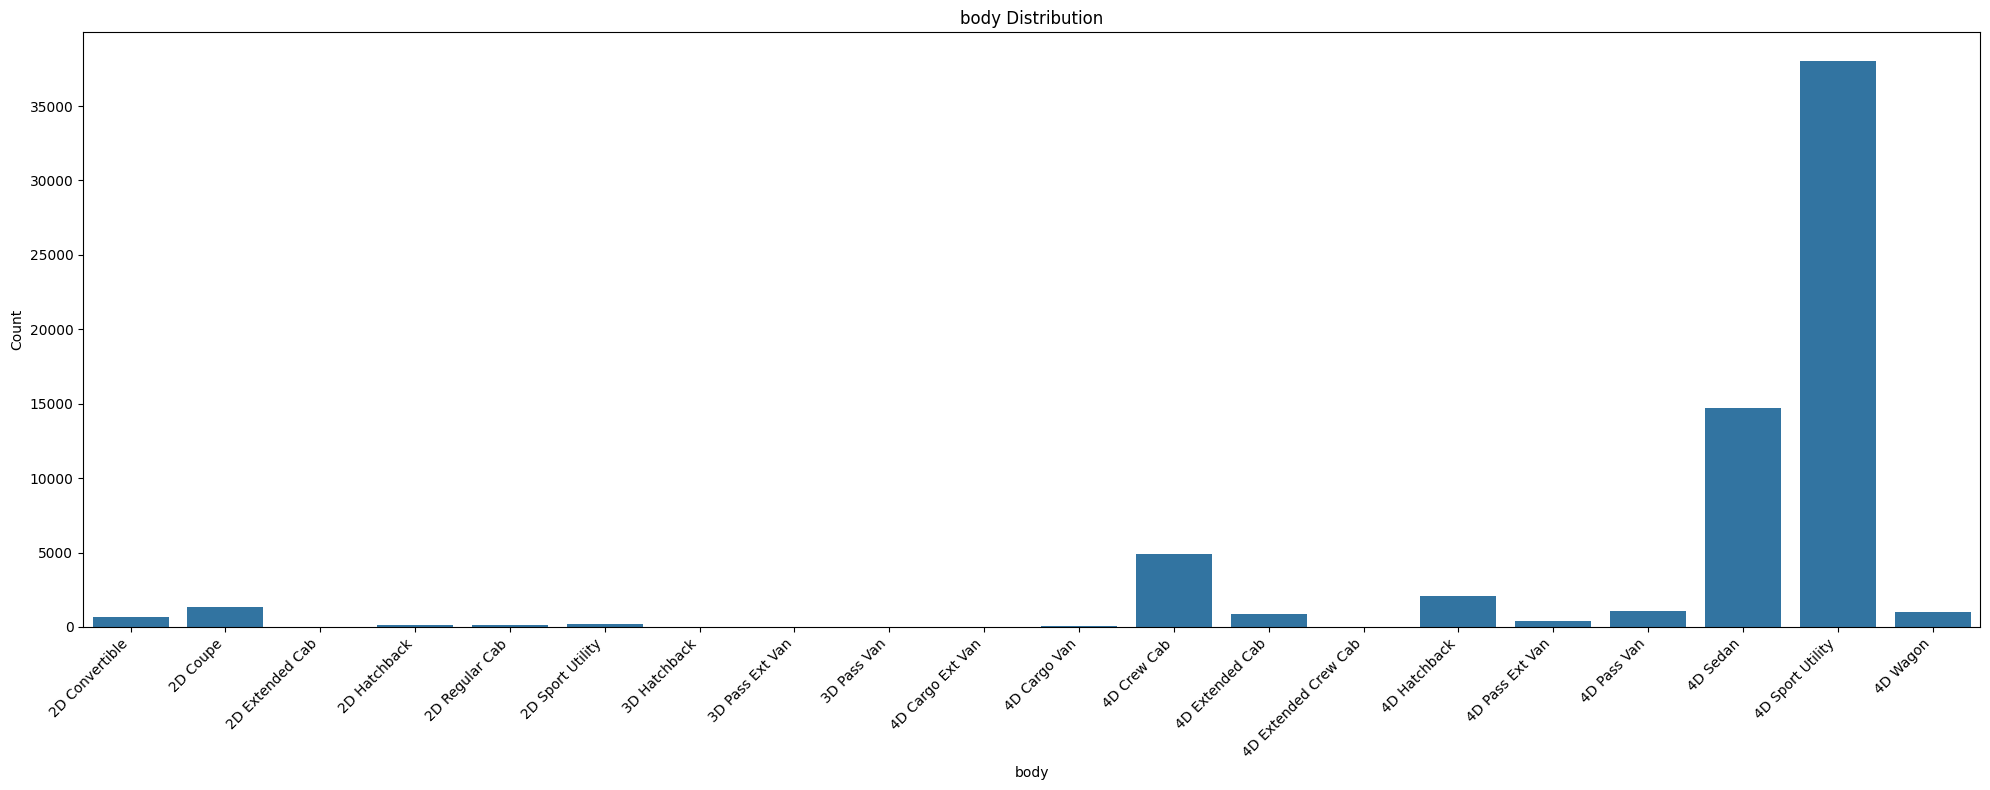

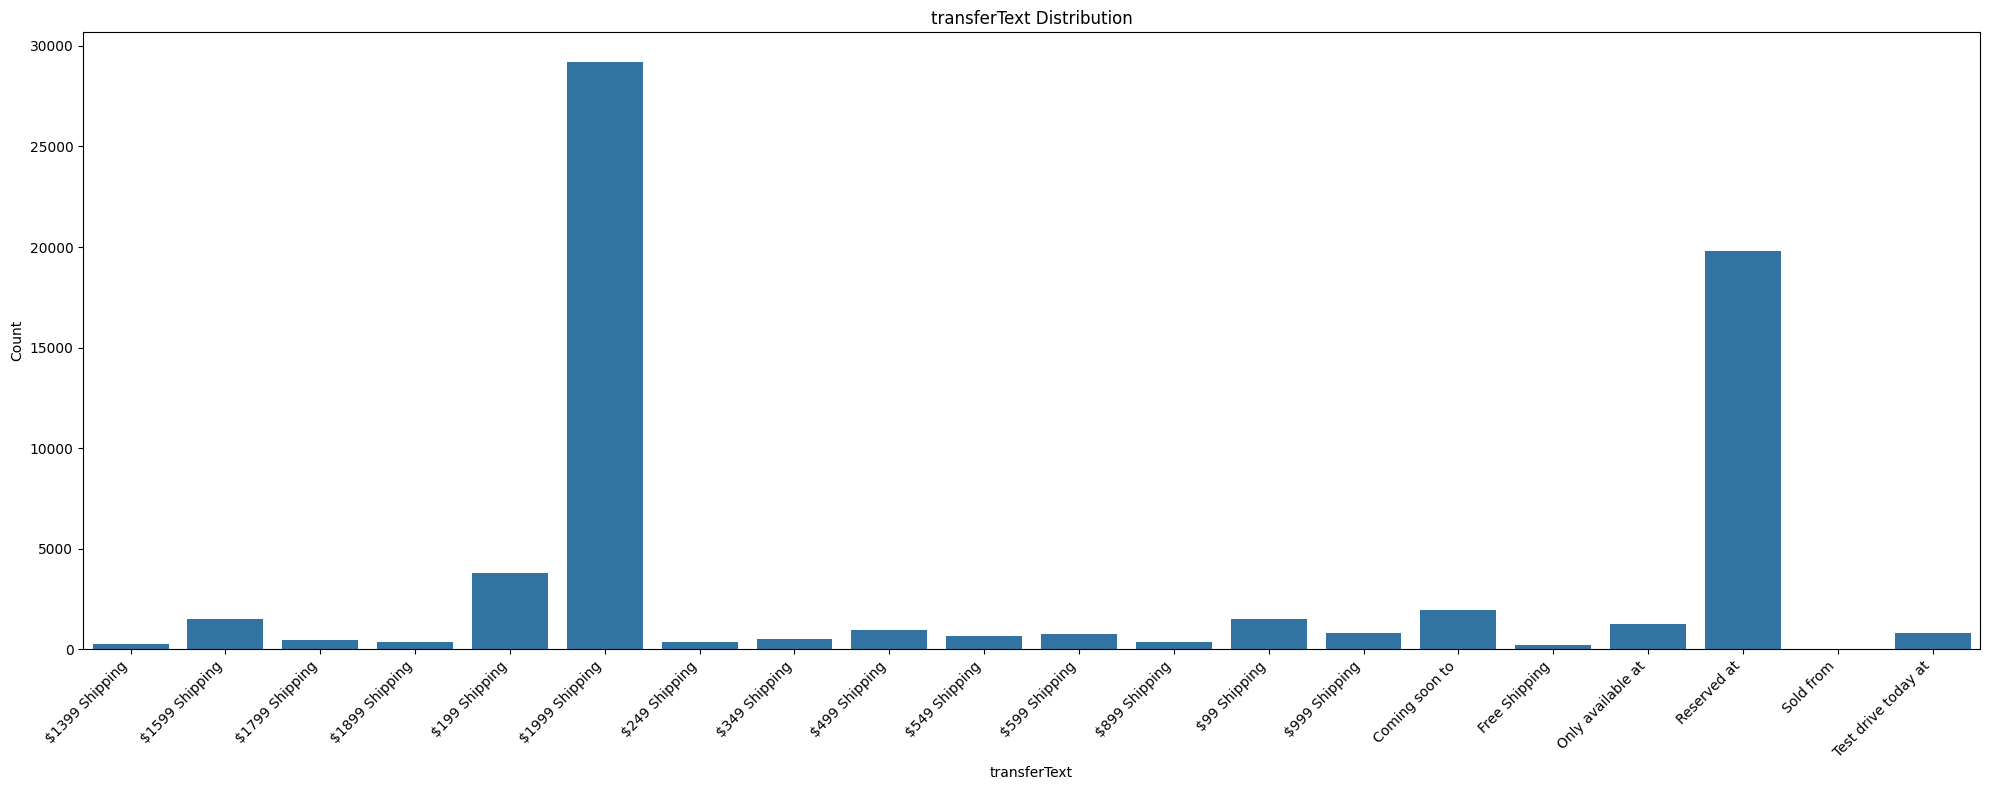

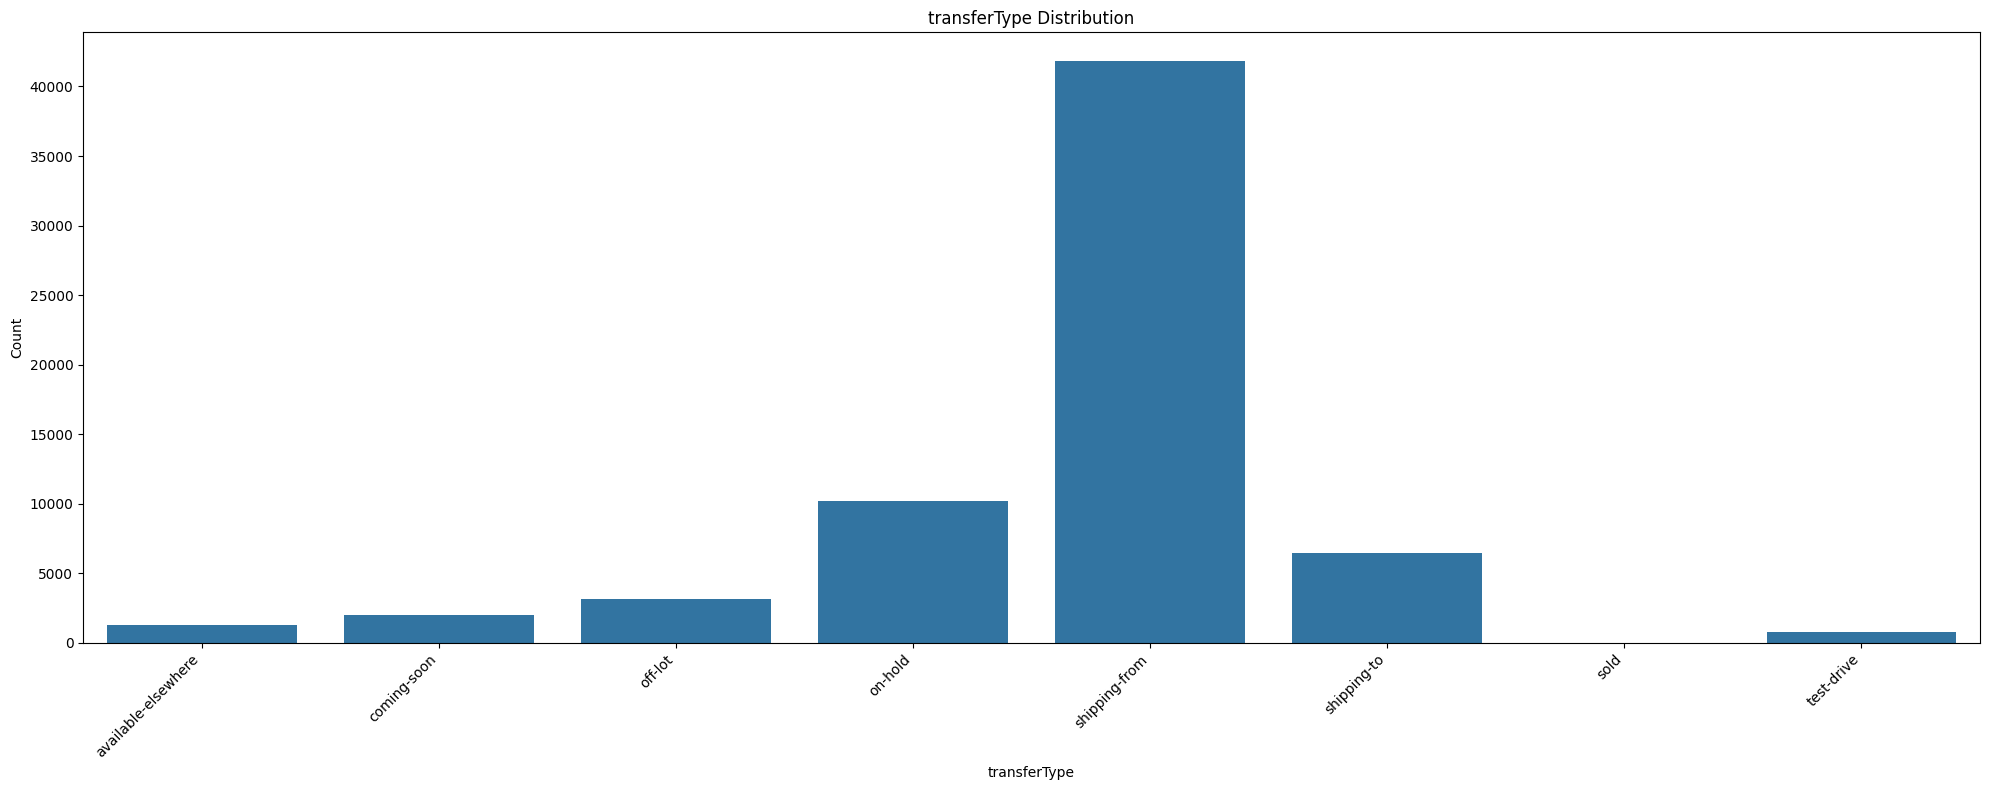

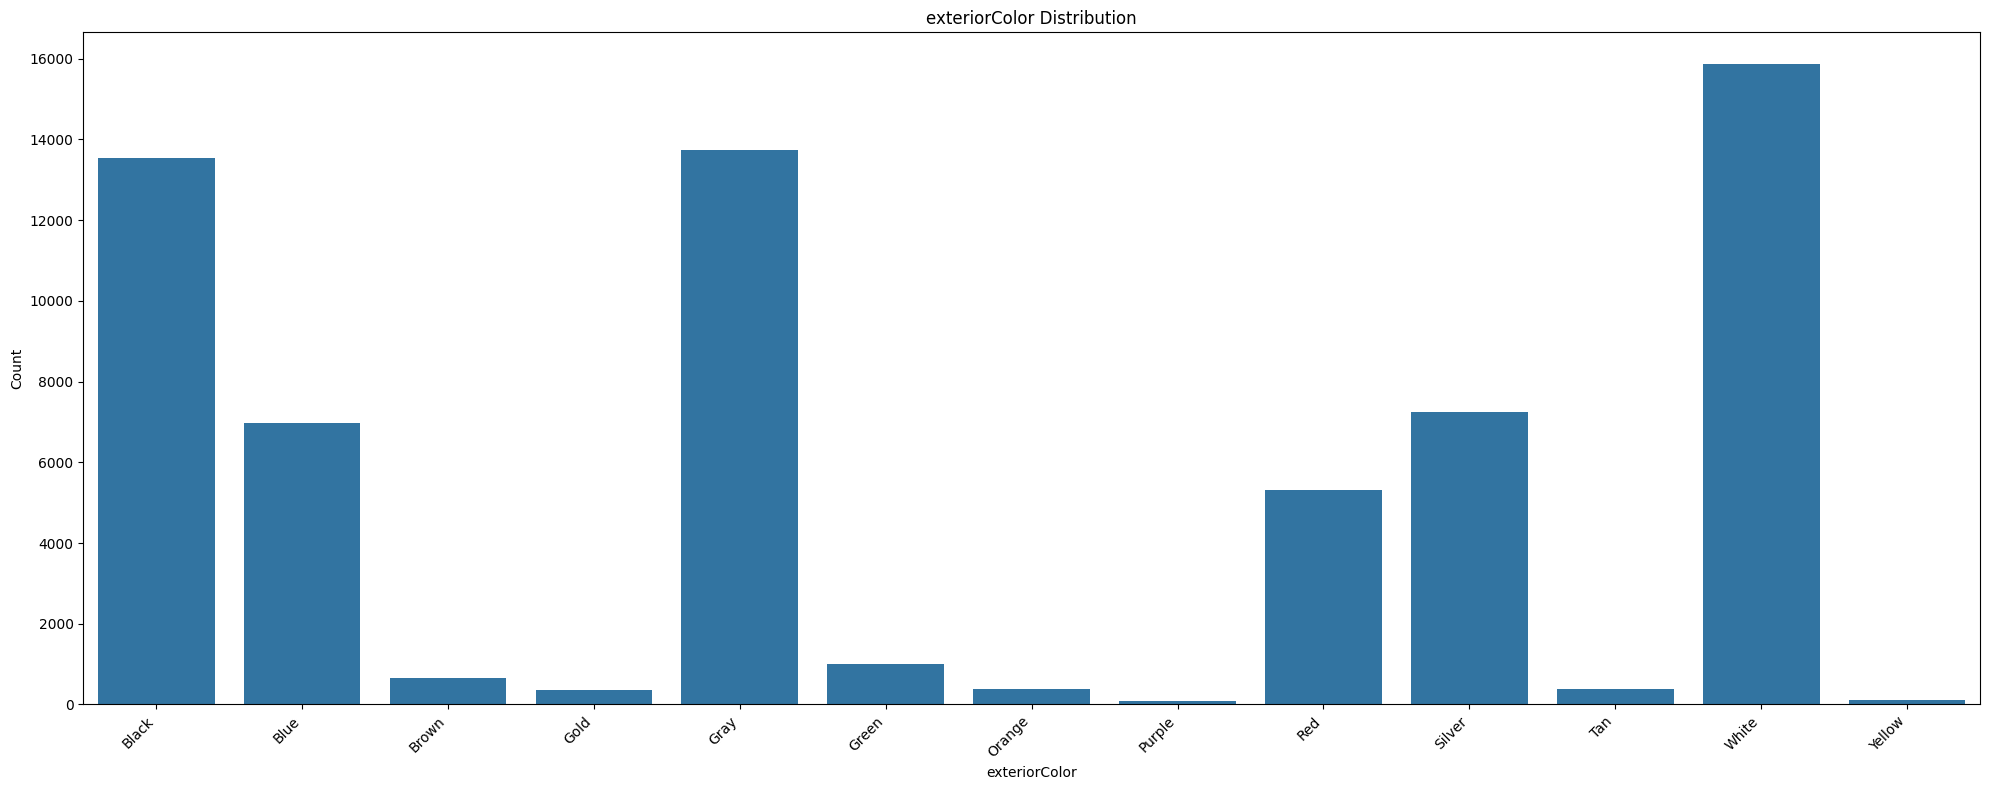

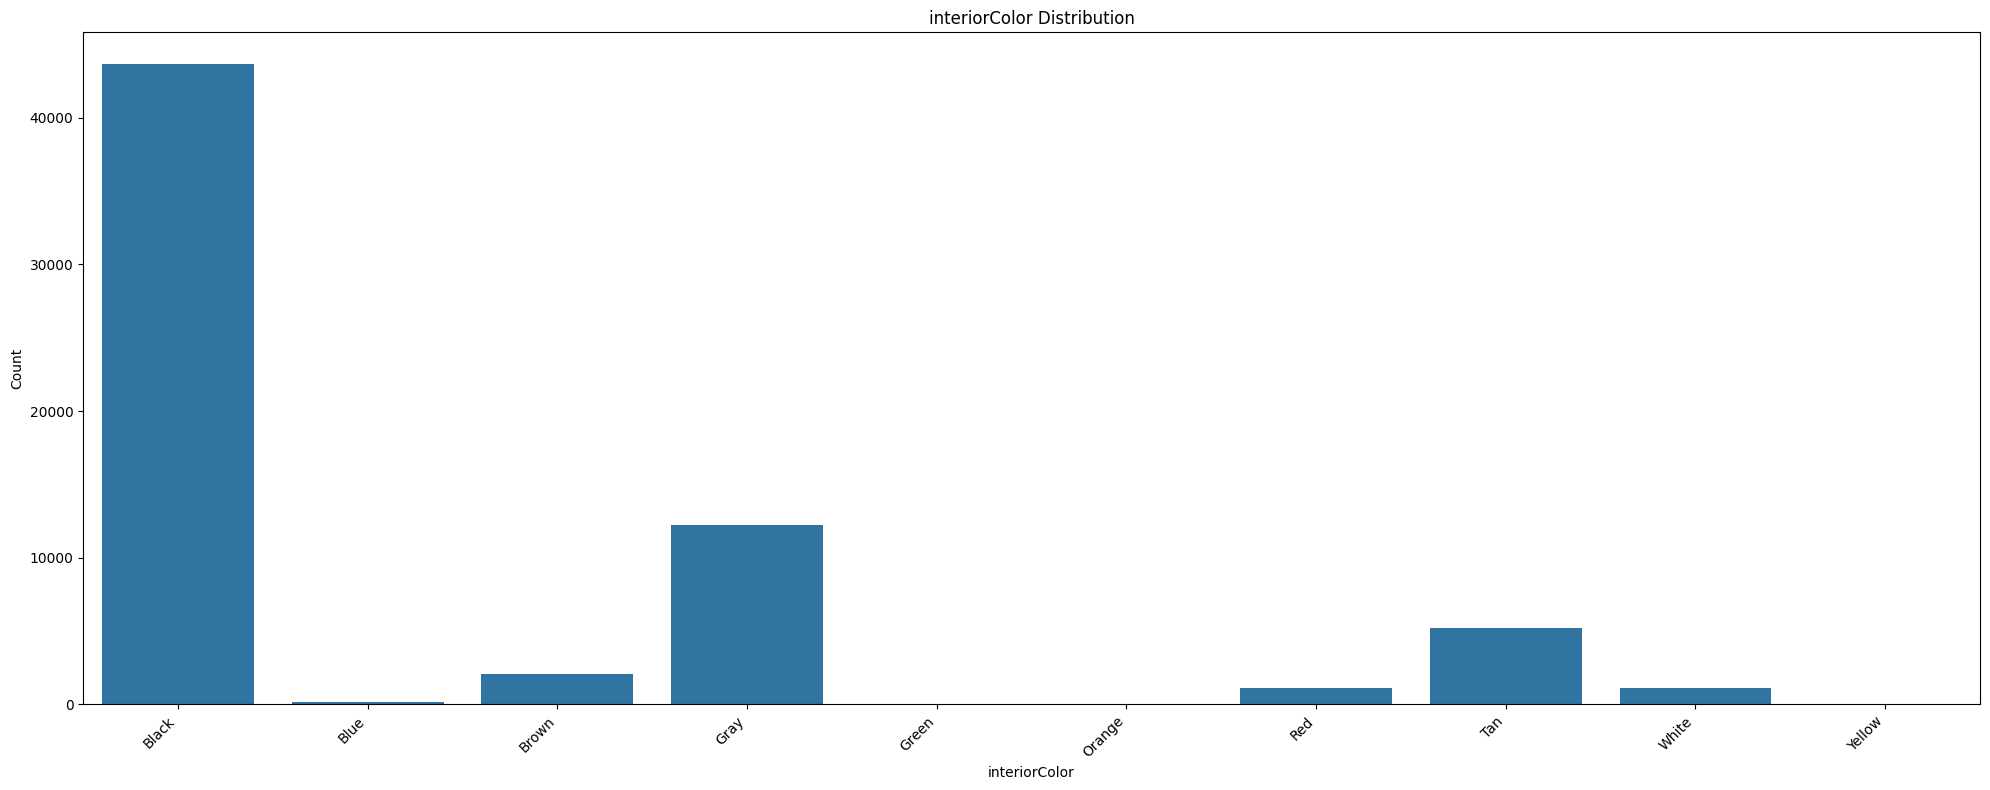

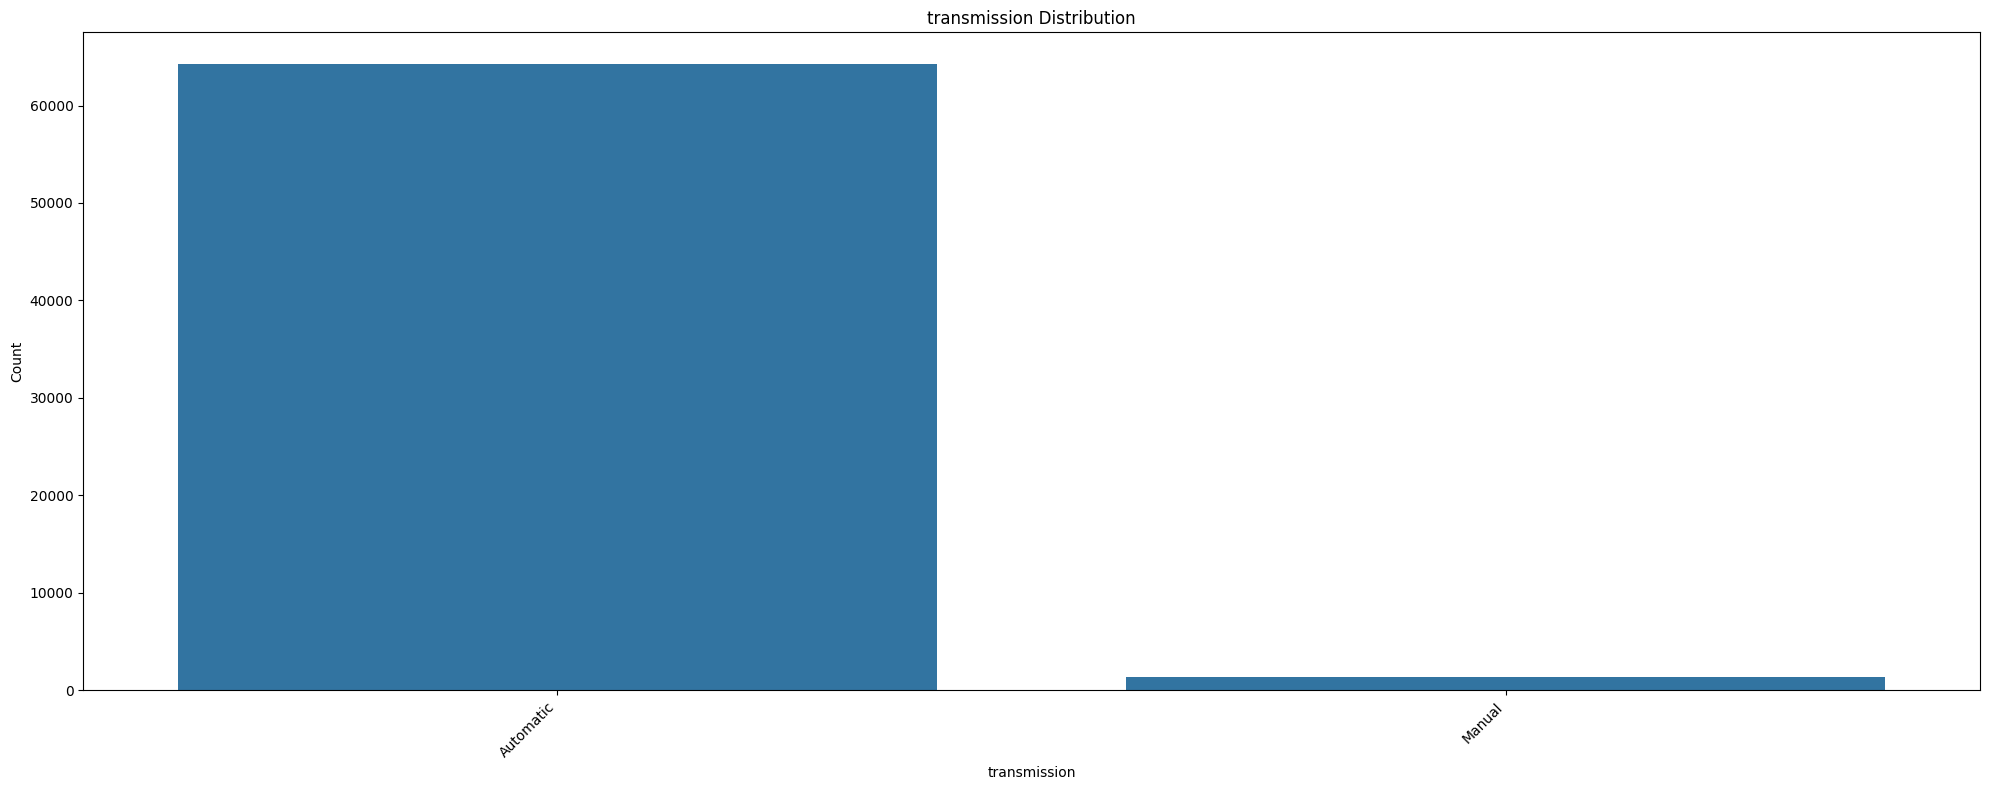

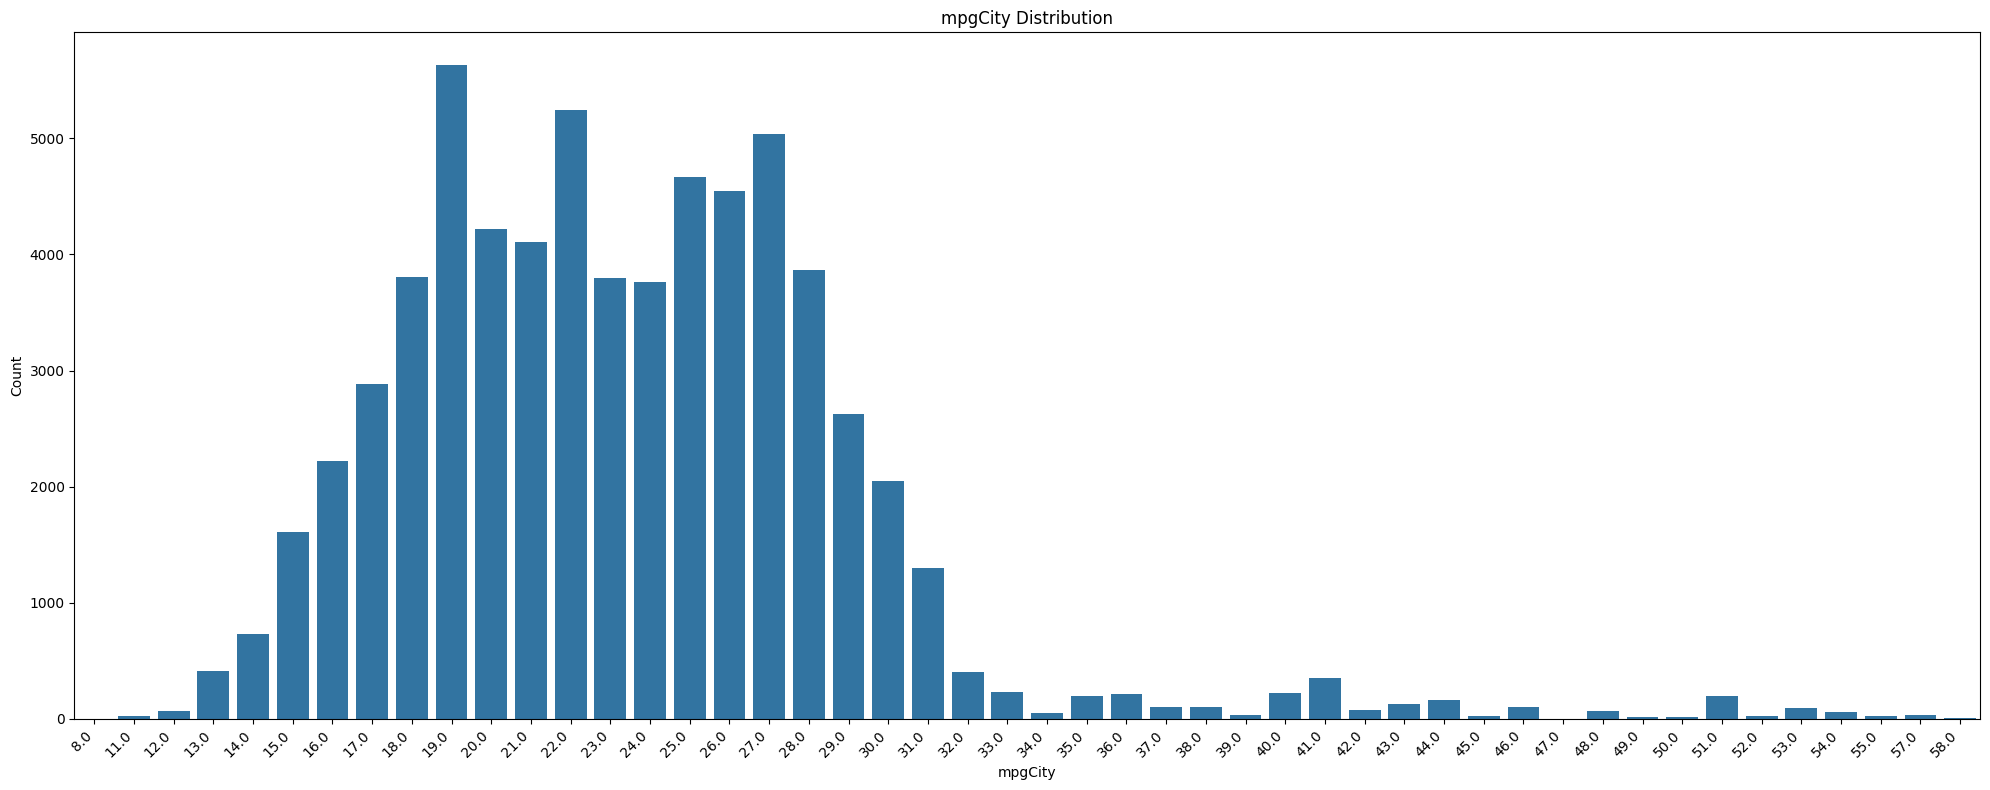

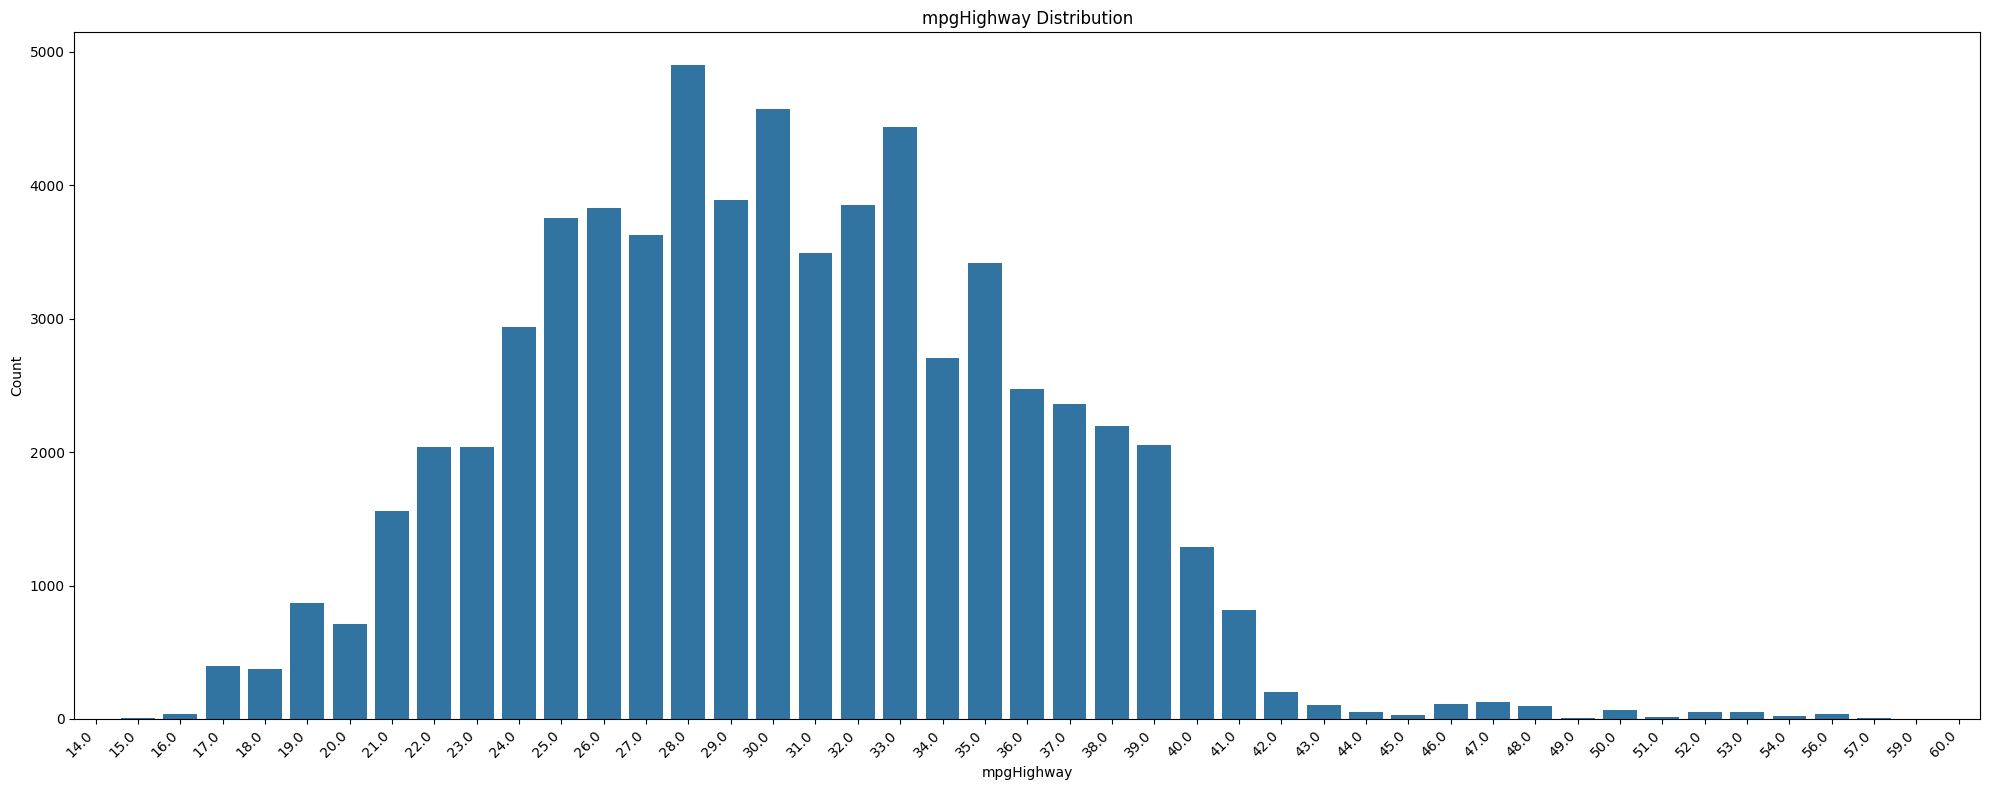

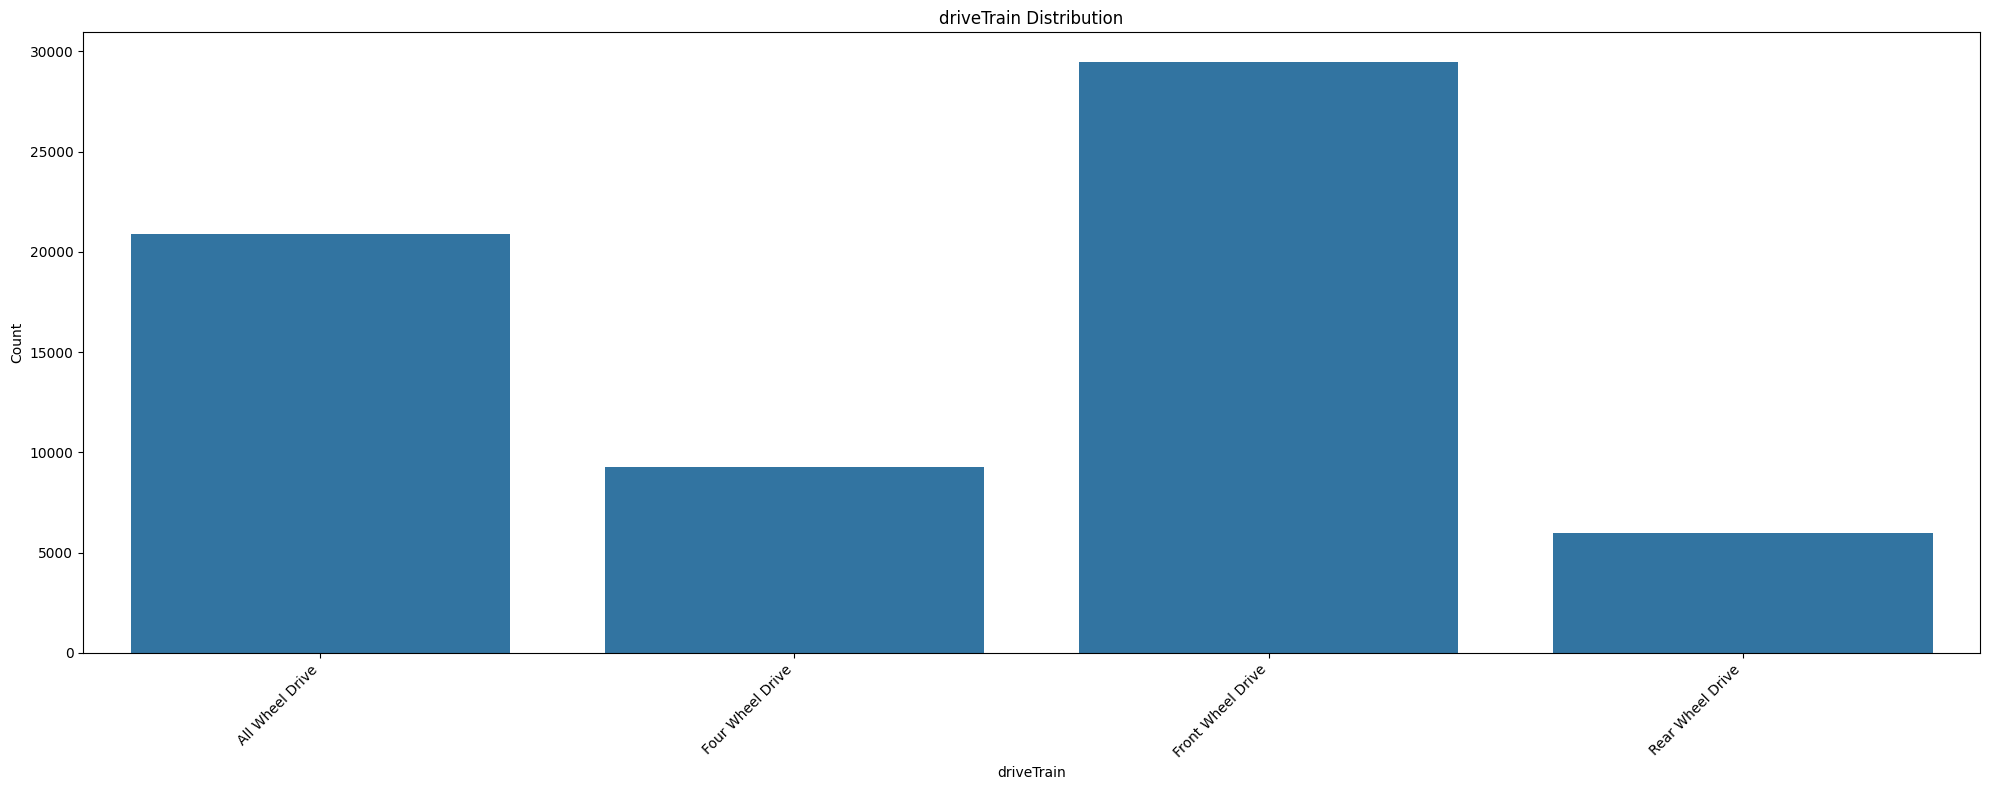

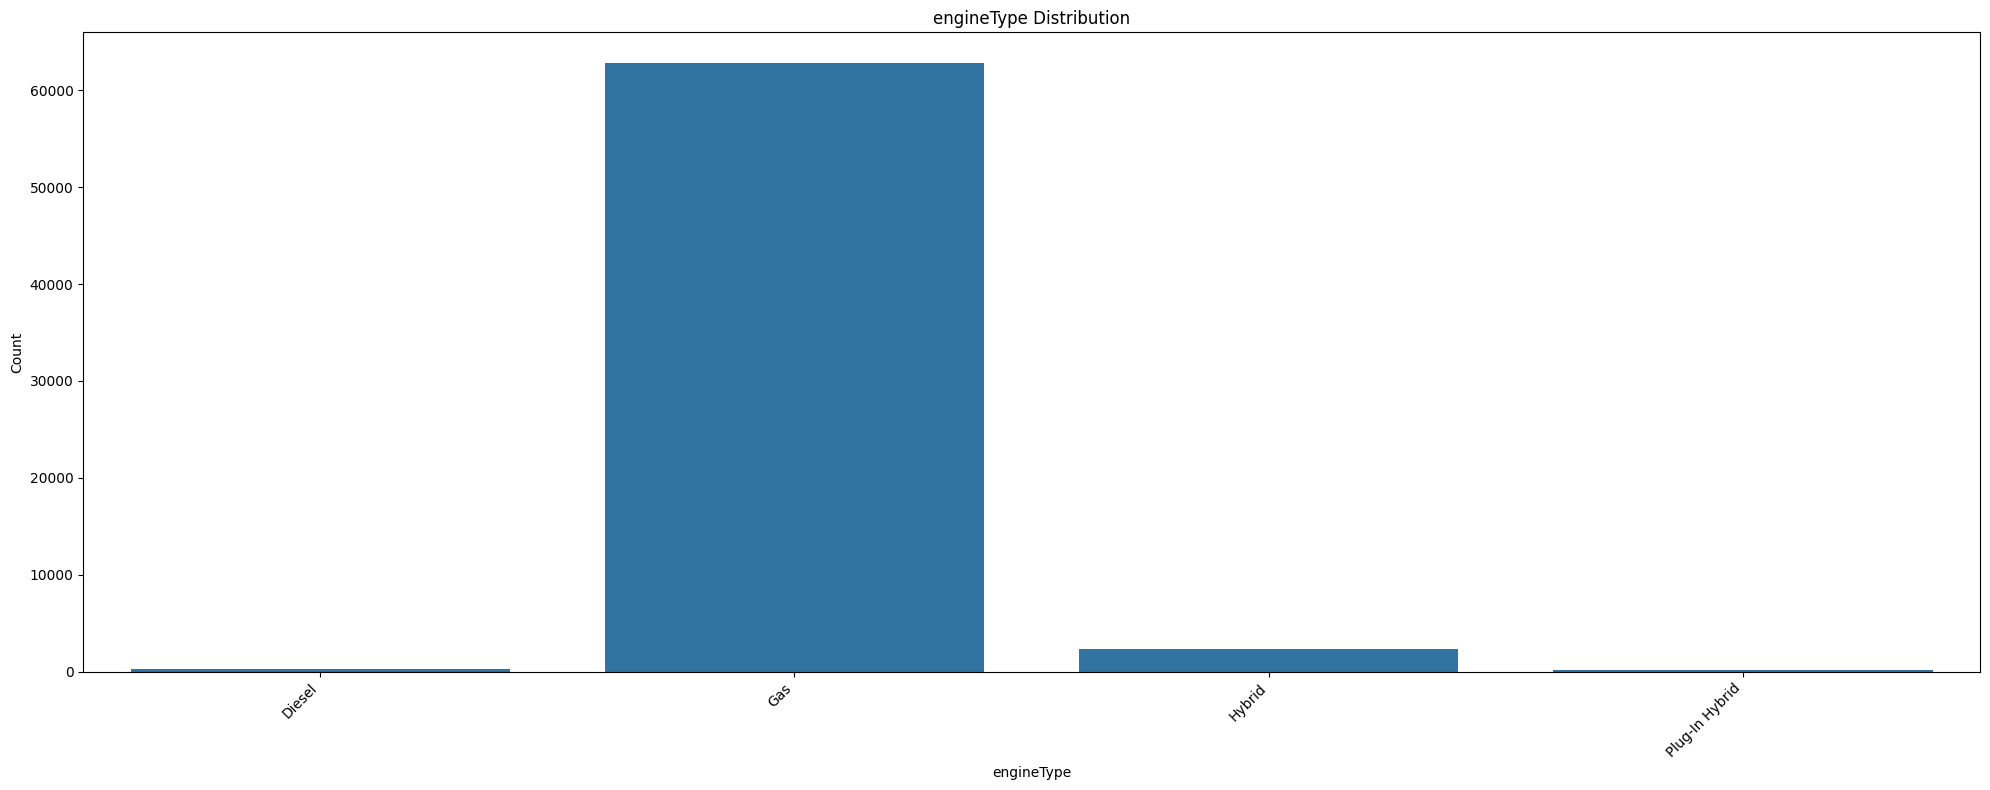

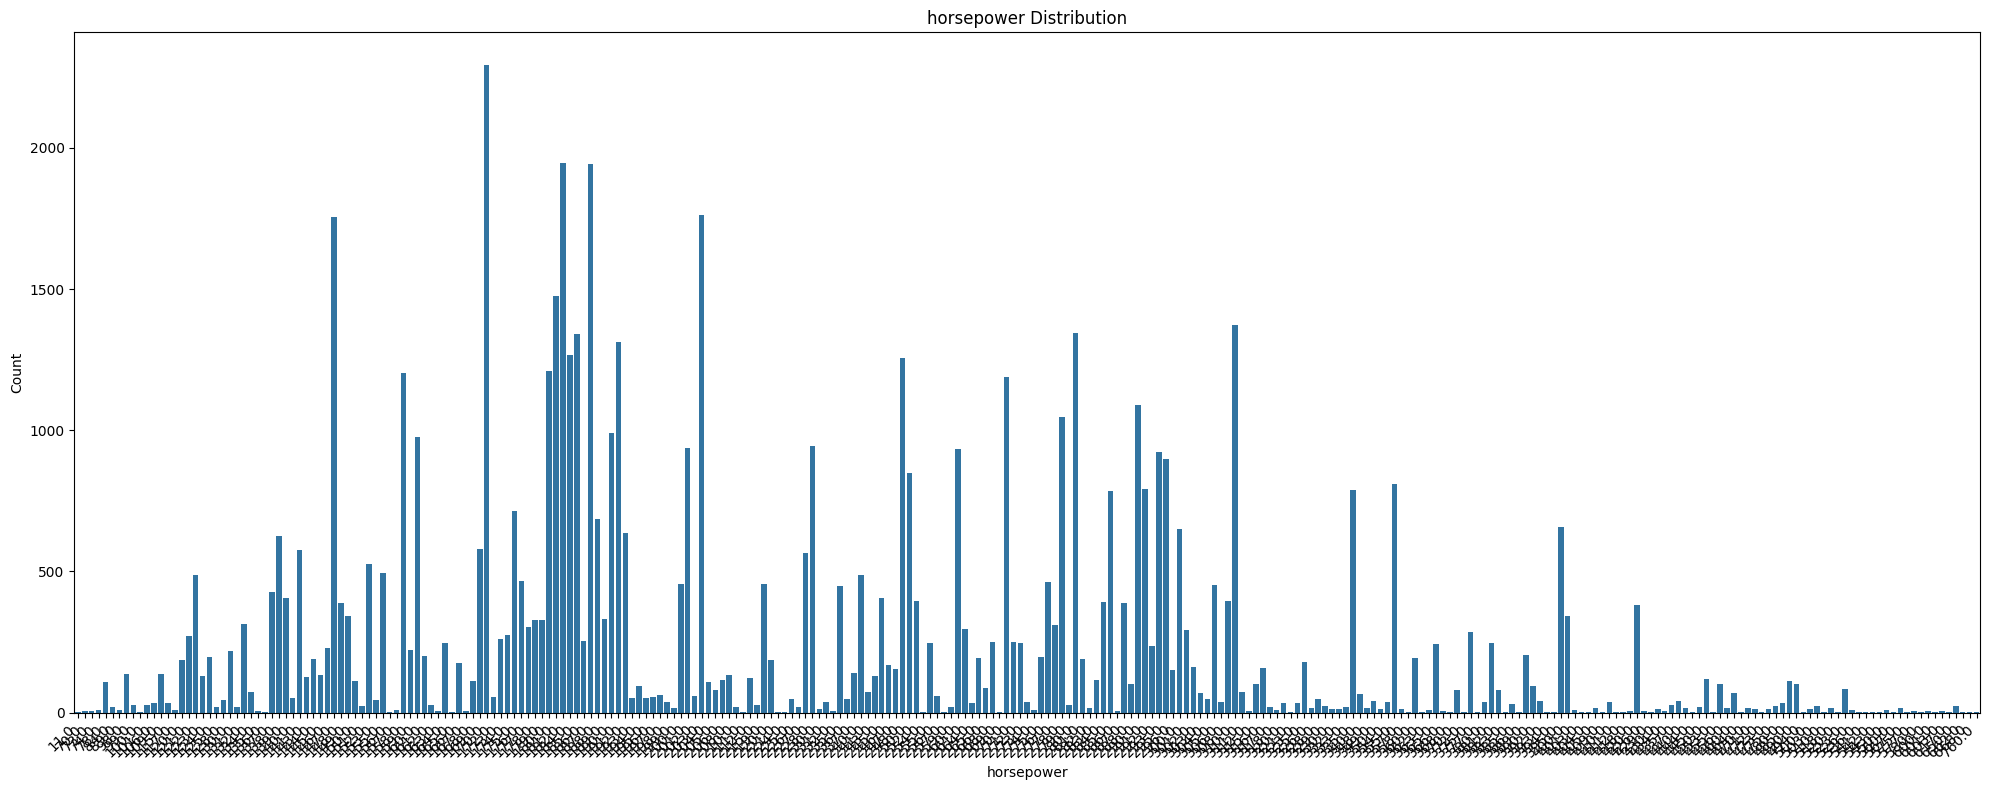

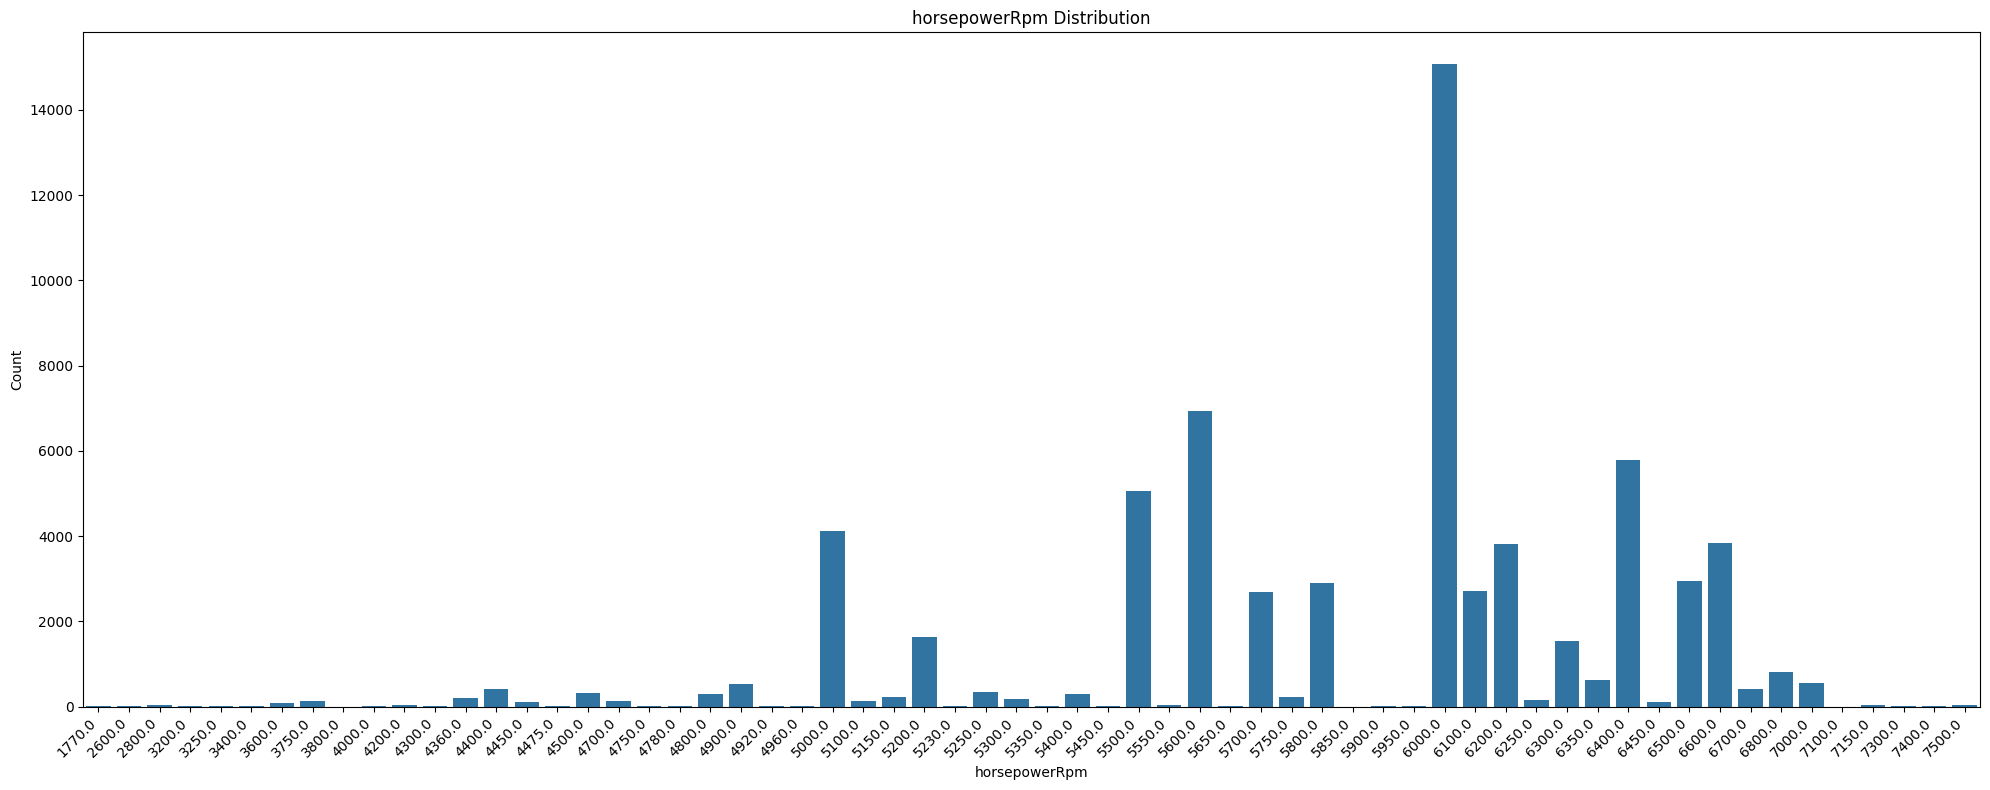

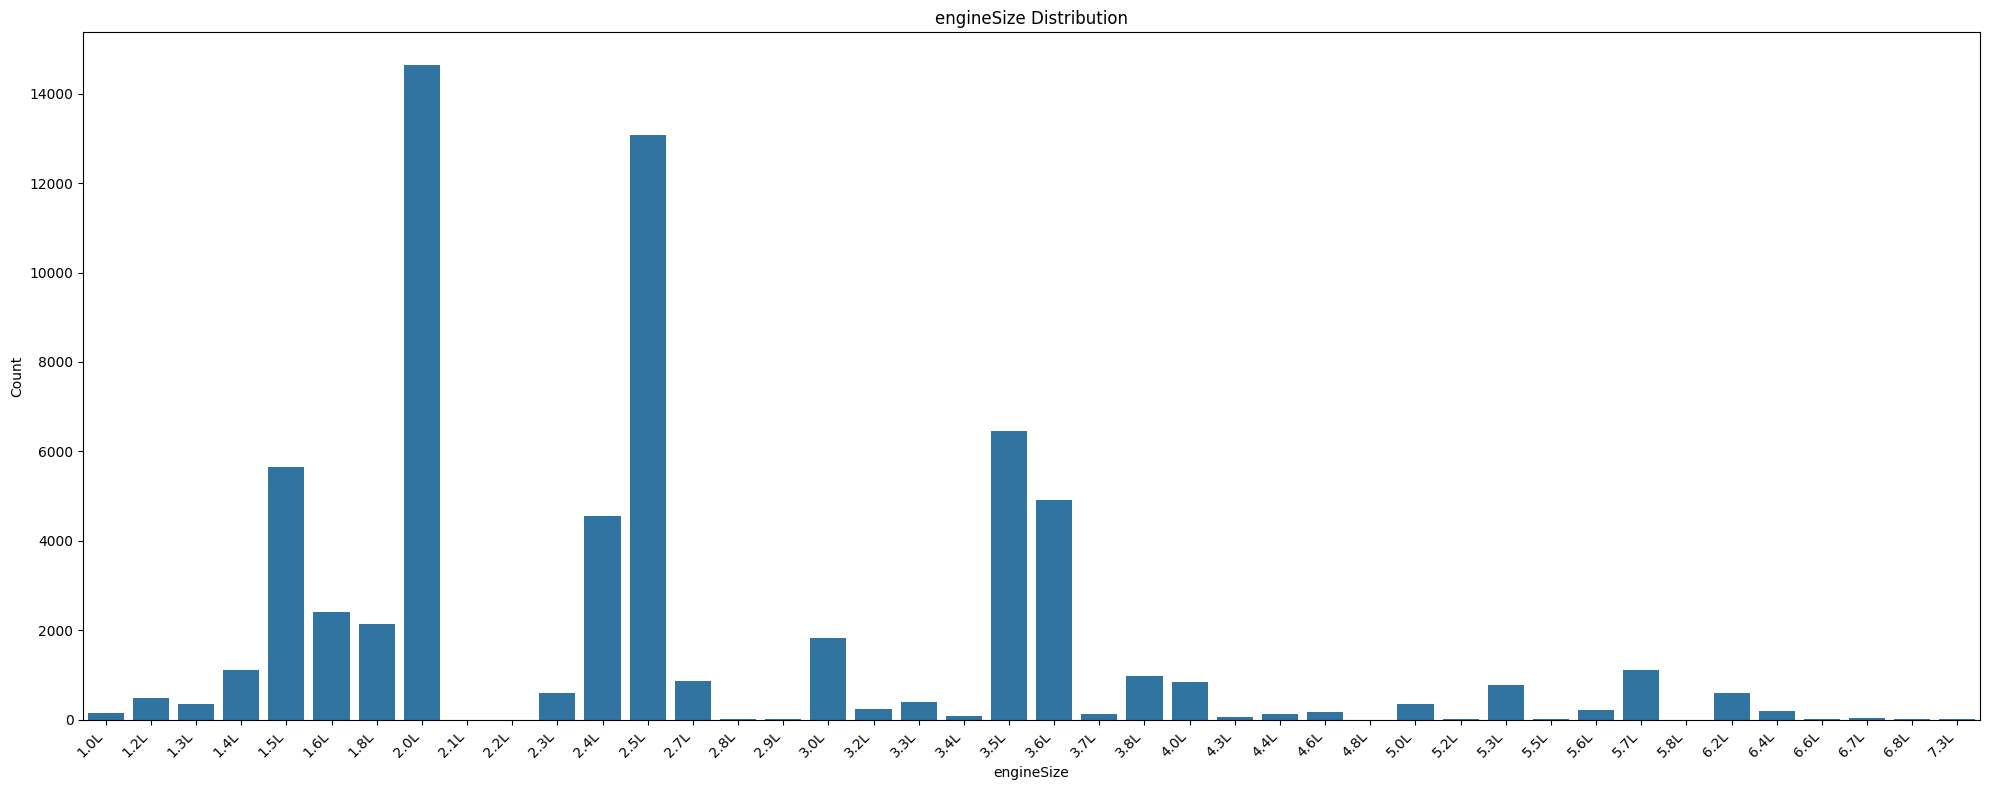

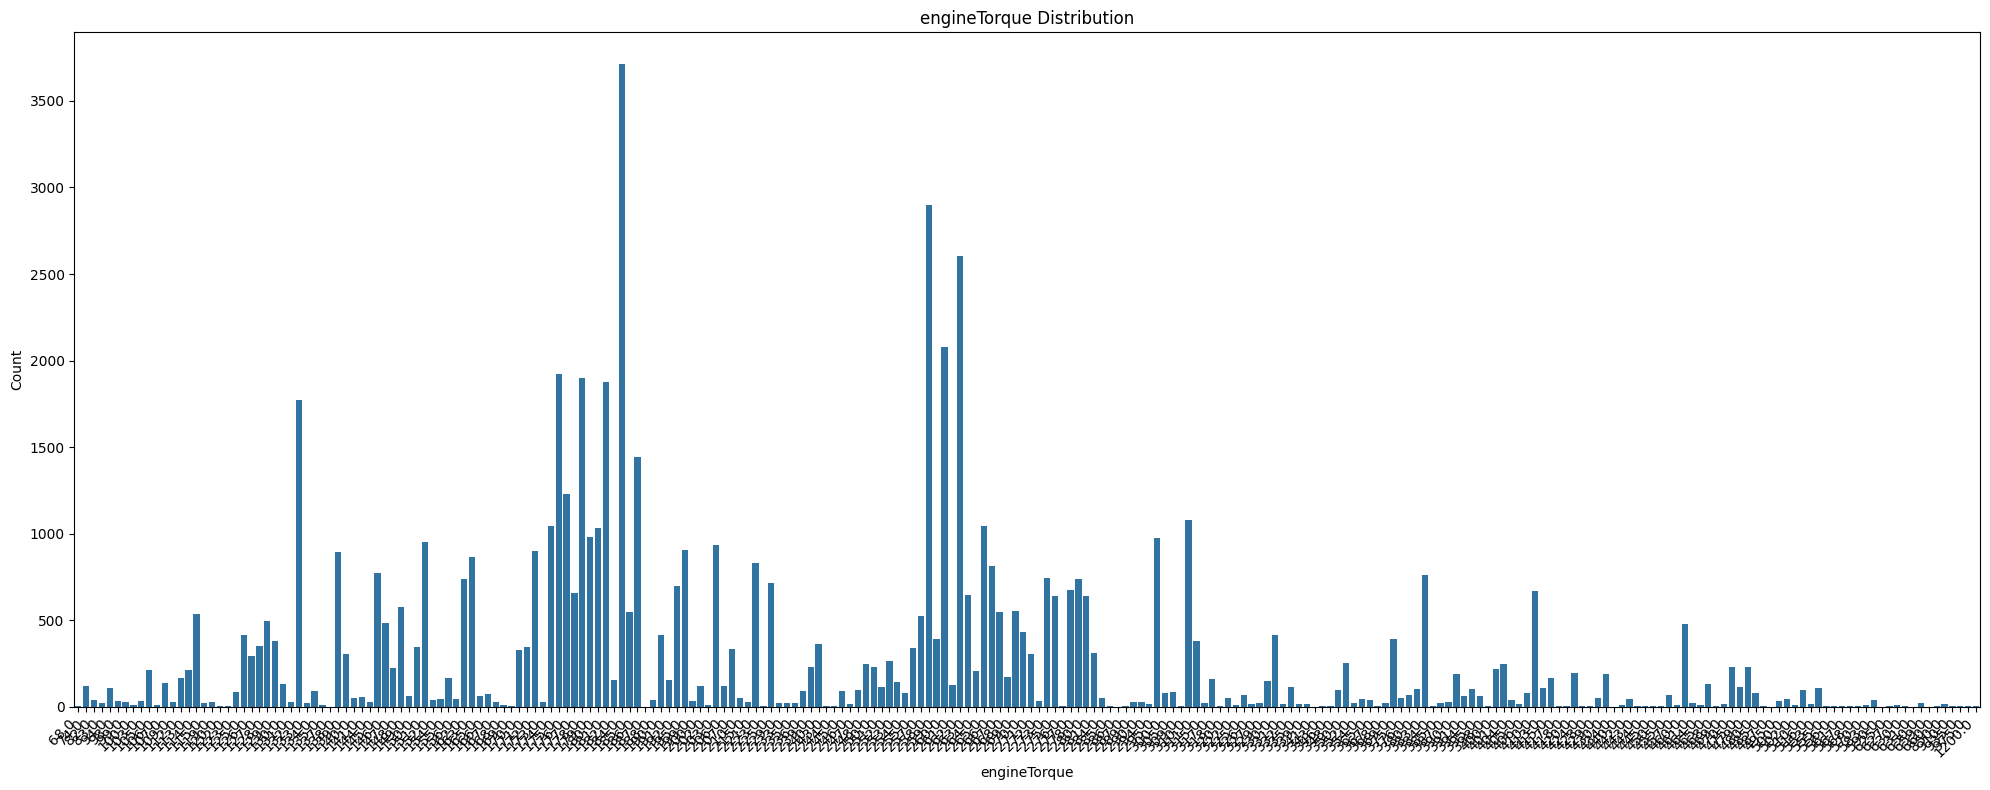

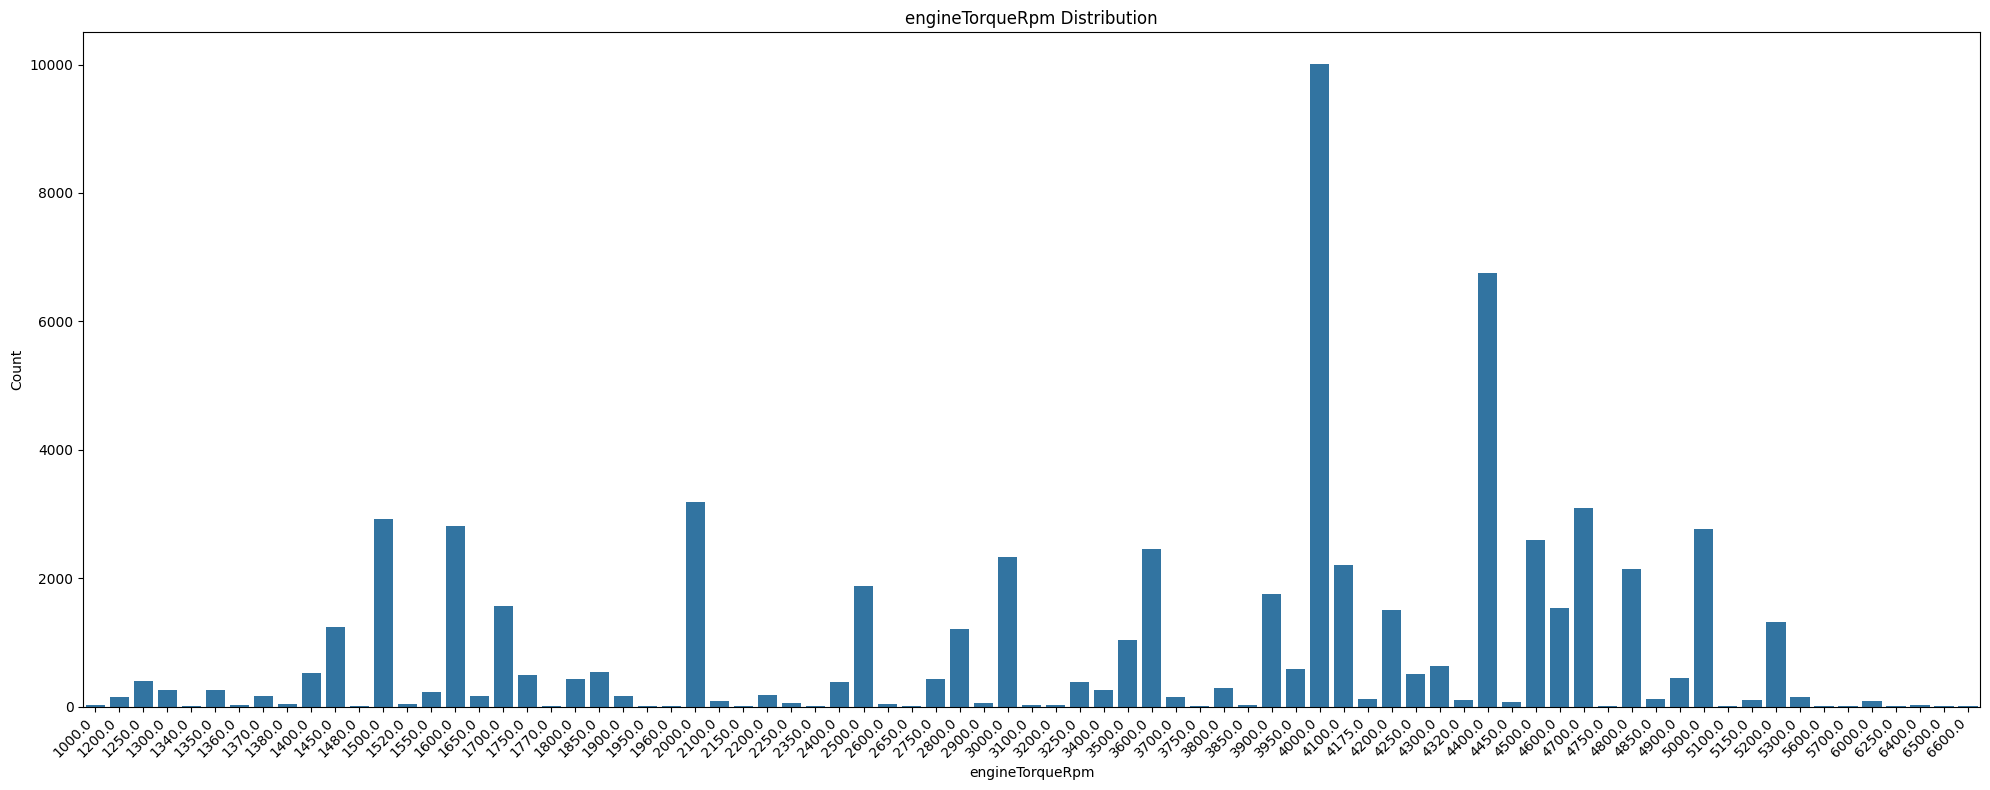

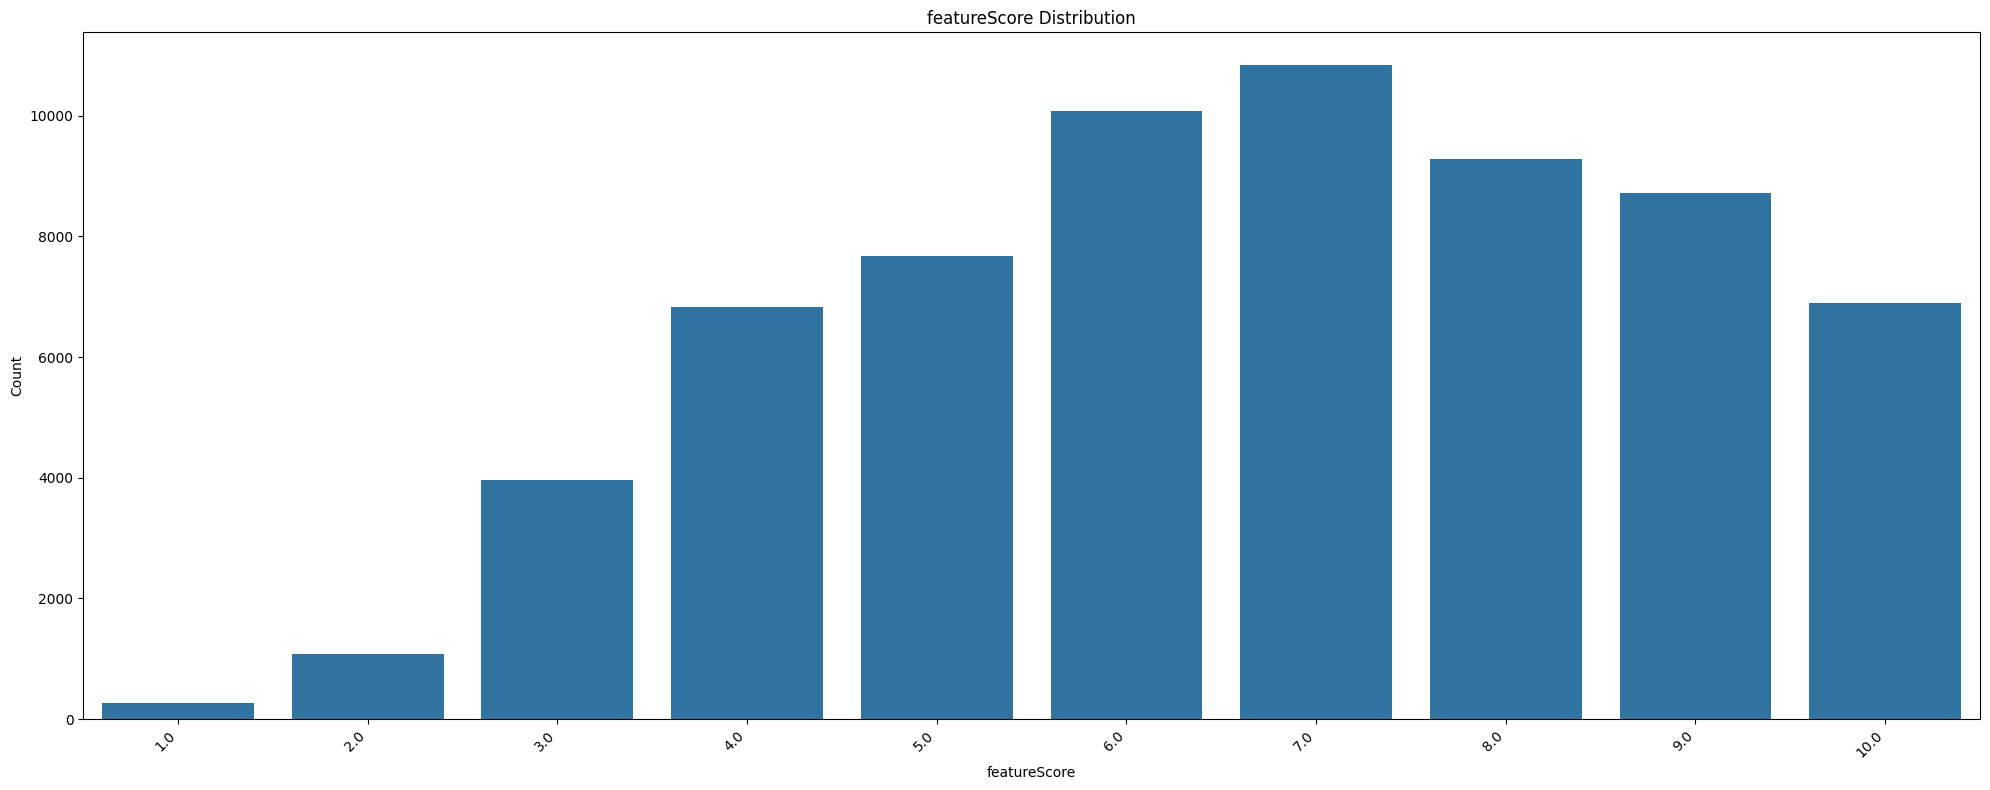

In [22]:
categorical_columns = [
    'body',
    'transferText', 'transferType', 'exteriorColor',
    'interiorColor', 'transmission', 'mpgCity',
    'mpgHighway', 'driveTrain', 'engineType',
    'horsepower', 'horsepowerRpm', 'engineSize',
    'engineTorque', 'engineTorqueRpm', 'featureScore'
]

for column in categorical_columns:
    plt.figure(figsize = (20, 8))
    sns.countplot(x = column, data=df_cleaned, order = sorted(df_cleaned[column].unique()))
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 45, ha = 'right')
    plt.tight_layout()
    plt.show()